### libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_colwidth', None)

### datasets

In [8]:
dict_path = '/Users/santiagocardenas/Documents/MDSI/202402/Statistical thinking for data science/STDS-at3/Data_dictionary-2.xlsx'
data_dict = pd.read_excel(dict_path, index_col = 0)
data_dict

,Description
Variable Name,
age,Age
job,Type of job
marital,Marital status
education,Level of education
default,Has credit in default
balance,Average yearly balance
housing,Has a housing loan
loan,Has a personal loan
contact,Contact communication type


to read the file was necessary to remove '"' string from the original dataset

In [9]:
file_path = '/Users/santiagocardenas/Documents/MDSI/202402/Statistical thinking for data science/STDS-at3/TeleCom_Data-2.csv'
with open(file_path, 'r') as file:
    original_content = file.read()
new_content = original_content.replace('"', '')
with open(file_path, 'w') as file:
    file.write(new_content)

compared to the data dictionary, there are two missing columns in the dataframe which are balance and day

In [10]:
file_path = '/Users/santiagocardenas/Documents/MDSI/202402/Statistical thinking for data science/assignment 1/TeleCom_Data-1.csv'
data = pd.read_csv(file_path, delimiter = ';')
data_dict.loc[np.logical_not(data_dict.index.isin(data.columns))]

,Description
Variable Name,
balance,Average yearly balance
day,Day of contact


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [12]:
data.shape

(41180, 21)

### data pre-processing

In [13]:
numeric_data = data.select_dtypes(include = ['number'])
numeric_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000
mean,40.021710,258.280427,2.567800,962.516707,0.172705,0.081901,93.575508,-40.501999,3.621422,5167.053344
std,10.419593,259.299856,2.770225,186.809028,0.493719,1.571037,0.578762,4.627358,1.734385,72.230334
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
non_numeric_cols = [x for x in data.columns if x not in numeric_data.columns]
non_numeric_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [15]:
pattern = r'\.\dy'
data['education'] = data['education'].map(lambda x : re.sub(pattern, '', x))
data['education'].value_counts()

basic                  12511
university.degree      12166
high.school             9513
professional.course     5241
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [16]:
data['education'] = data['education'].map(lambda x : x.replace('.', ' '))
data['education'].value_counts()

basic                  12511
university degree      12166
high school             9513
professional course     5241
unknown                 1731
illiterate                18
Name: education, dtype: int64

removing the '.' from job column

In [17]:
data['job'] = data['job'].map(lambda x : x.replace('.', ''))
data['job'].value_counts()

admin            10422
blue-collar       9253
technician        6742
services          3967
management        2923
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### data exploration

#### age

<Axes: xlabel='age', ylabel='Count'>

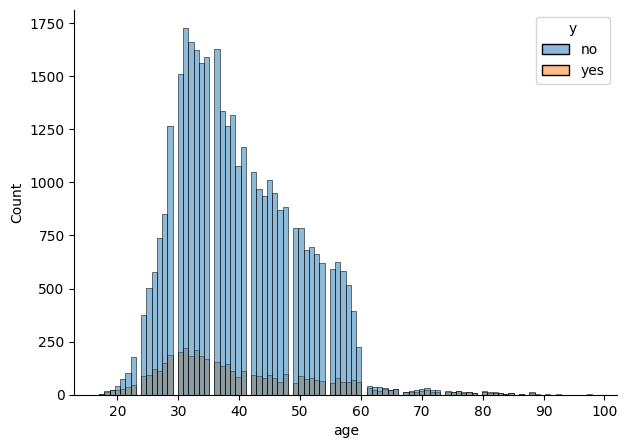

In [14]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.histplot(
    data = data,
    x = 'age',
    ax = axis,
    hue = 'y'
)

<Axes: xlabel='age'>

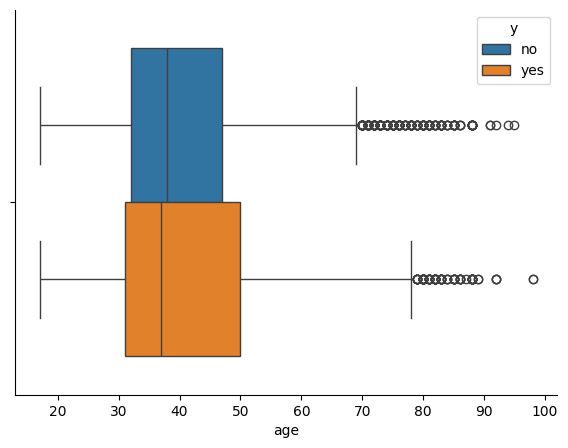

In [15]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'age',
    ax = axis,
    hue = 'y'
)

In [16]:
data[data['age'] > 60]['y'].value_counts(normalize = True)

no     0.545154
yes    0.454846
Name: y, dtype: float64

In [17]:
data[data['age'] < 60]['y'].value_counts(normalize = True)

no     0.895796
yes    0.104204
Name: y, dtype: float64

when analysing age it is possible to identify an age bracket where the likelyhood of success for the marketing campaing increases dramatically<br>
- for people youger than 60, the chance of success is 10%
- for people older than 60, the chance of success is 45%. Which is more like a coin toss slightly tilted towards no

#### duration

In [18]:
data_dict.loc['duration']

Description    Last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
Name: duration, dtype: object

In [19]:
data[data['duration'] == 0]['y'].value_counts()

no    4
Name: y, dtype: int64

<Axes: xlabel='duration', ylabel='Count'>

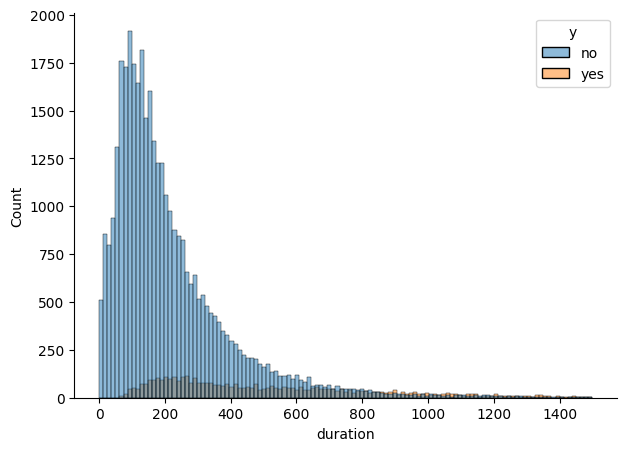

In [20]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.histplot(
    data = data[data['duration'] < 1500],
    x = 'duration',
    ax = axis,
    hue = 'y'
)

<Axes: xlabel='duration'>

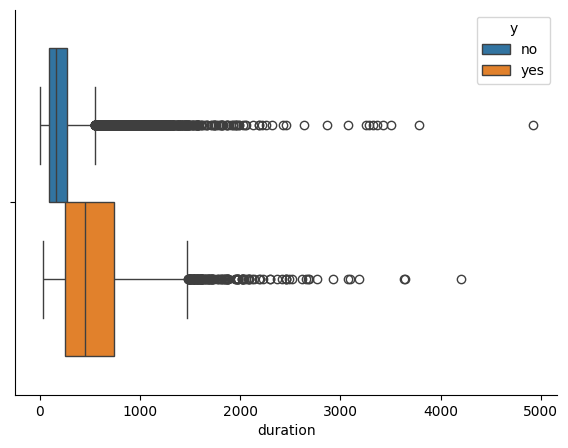

In [21]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'duration',
    ax = axis,
    hue = 'y'
)

In [22]:
print('{} seconds are equivalent to {} minutes'.format(1500, 1500 / 60))

1500 seconds are equivalent to 25.0 minutes


In [23]:
data[data['duration'] > 1500]['y'].value_counts(normalize = True)

yes    0.626214
no     0.373786
Name: y, dtype: float64

In [24]:
data[data['duration'] < 1500]['y'].value_counts(normalize = True)

no     0.889976
yes    0.110024
Name: y, dtype: float64

**takeways about duration**
- data must be cleaned for values where duration is 0, meaning that there was no succces in the campaing
- it is possible to delete data above 2000 seconds given that those are considerable outliers
- additionally, calls that lasted more than 1500 seconds have a higher sucess rate compared to calls that last shorther

#### campaign

In [25]:
data_dict.loc['campaign']

Description    Number of contacts performed during this campaign and for this client
Name: campaign, dtype: object

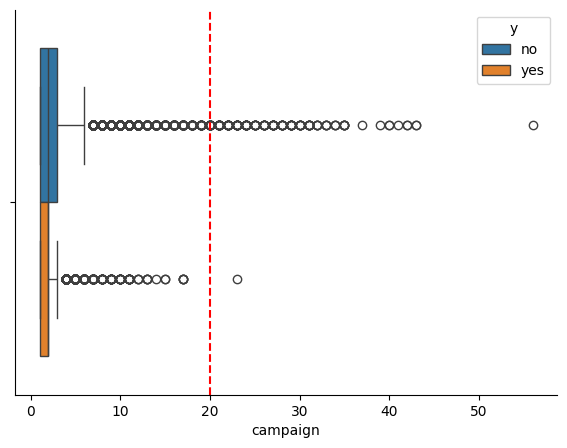

In [26]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'campaign',
    ax = axis,
    hue = 'y'
)
axis.axvline(20, linestyle = '--', color = 'red')

<Axes: xlabel='campaign', ylabel='count'>

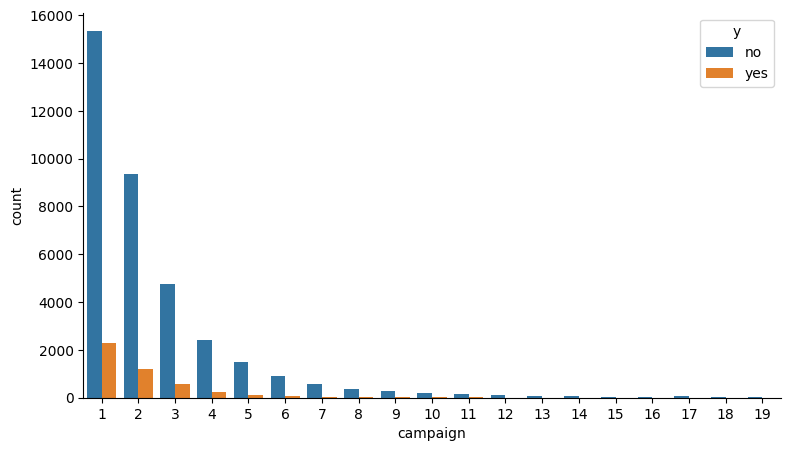

In [27]:
fig, axis = plt.subplots(figsize = (9, 5))
sns.despine(fig)
sns.countplot(
    data = data[data['campaign'] < 20],
    x = 'campaign',
    ax = axis,
    hue = 'y'
)

In [28]:
data[data['campaign'] > 20]['y'].value_counts()

no     156
yes      1
Name: y, dtype: int64

**main takeaways from campaign**
- more that 20 contacts per customer does not produce any success on the marketing campaign (with one only excpetion)
- it is possible to delete data with more than 20 contacts in campaign

#### pdays

In [29]:
data_dict.loc['pdays']

Description    Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
Name: pdays, dtype: object

In [30]:
median_not_sucess = data[np.logical_and(data['y'] == 'no', data['pdays'] < 200)]['pdays'].median()
median_sucess = data[np.logical_and(data['y'] == 'yes', data['pdays'] < 200)]['pdays'].median()
print('the median pdays for success in campaign is {} \nthe median pdays for unsuccess outcome in campaign is {}'.format(median_sucess, median_not_sucess))

the median pdays for success in campaign is 6.0 
the median pdays for unsuccess outcome in campaign is 6.0


In [31]:
pdays_dict = {'yes' : median_sucess,
              'no' : median_not_sucess}
condition = data['pdays'] == data['pdays'].max()
data.loc[condition, 'pdays'] = data.loc[condition, 'y'].map(pdays_dict)

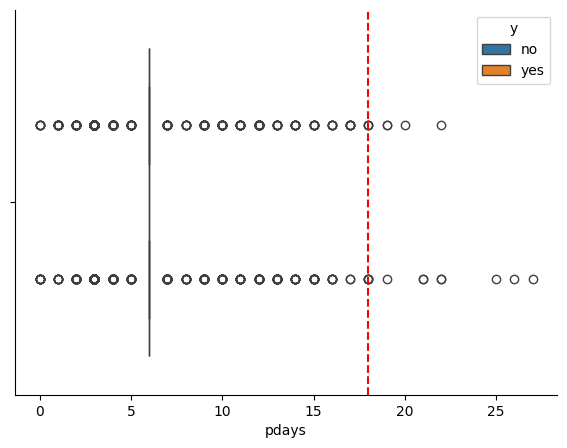

In [32]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'pdays',
    ax = axis,
    hue = 'y'
)
axis.axvline(18, linestyle = '--', color = 'red')

**takeaways from pdays**
- there were massive inconsistencies on the original data given the massive outliers
- when data modification was perfomed there is no difference between target variable for pdays

#### previous

In [33]:
data_dict.loc['previous']

Description    Number of contacts performed before this campaign and for this client 
Name: previous, dtype: object

<Axes: xlabel='previous', ylabel='count'>

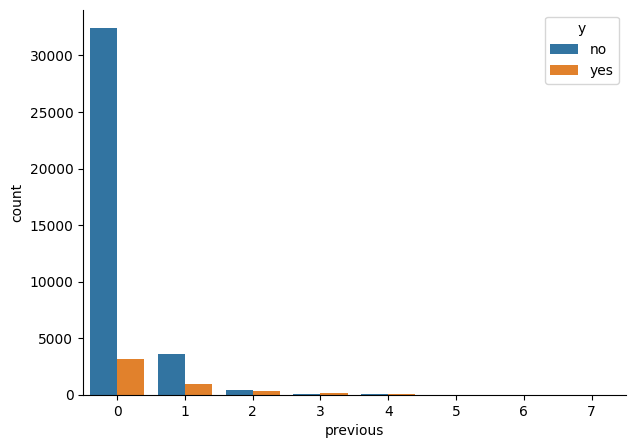

In [34]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    x = 'previous',
    ax = axis,
    hue = 'y'
)

In [35]:
data[data['previous'] == 0]['y'].value_counts(normalize=True)

no     0.911668
yes    0.088332
Name: y, dtype: float64

In [36]:
data[data['previous'] > 0]['y'].value_counts(normalize=True)

no     0.733677
yes    0.266323
Name: y, dtype: float64

**takeawsys from previous**
- most people was not contacted by the company previous to the campaign
- if the company has built some kind of rapport with the customer it is more likely for the campaign to be succesful
- no data modification required

#### emp.var.rate

In [37]:
data_dict.loc['emp.var.rate']

Description    employment variation rate - quarterly indicator (numeric)
Name: emp.var.rate, dtype: object

<Axes: xlabel='emp.var.rate', ylabel='Count'>

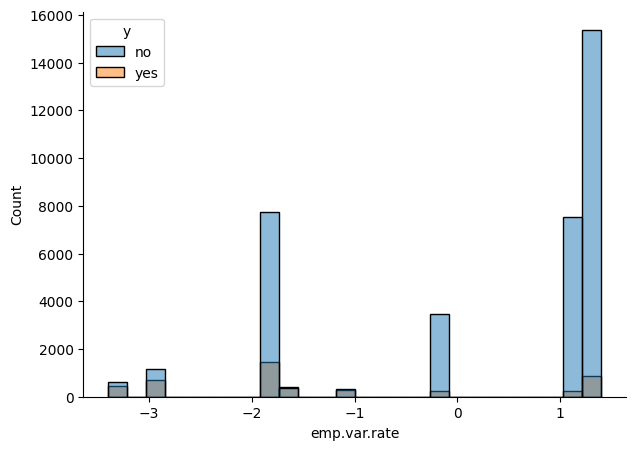

In [38]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.histplot(
    data = data,
    x = 'emp.var.rate',
    ax = axis,
    hue = 'y'
)

In [39]:
data['emp.var.rate'].value_counts().sort_index()

-3.4     1071
-3.0      172
-2.9     1663
-1.8     9184
-1.7      773
-1.1      631
-0.2       10
-0.1     3683
 1.1     7759
 1.4    16234
Name: emp.var.rate, dtype: int64

In [40]:
data[data['emp.var.rate'] > 0]['y'].value_counts(normalize=True)

no     0.953903
yes    0.046097
Name: y, dtype: float64

In [41]:
data[data['emp.var.rate'] < 0]['y'].value_counts(normalize=True)

no     0.794496
yes    0.205504
Name: y, dtype: float64

**takeaways from emp.var.rate**
- counter intuitively, the campaign was relatively more successuful when employment shrunk
- no data modification required

#### cons.price.idx

In [42]:
data_dict.loc['cons.price.idx']

Description    consumer price index - monthly indicator (numeric)    
Name: cons.price.idx, dtype: object

<Axes: xlabel='cons.price.idx', ylabel='Count'>

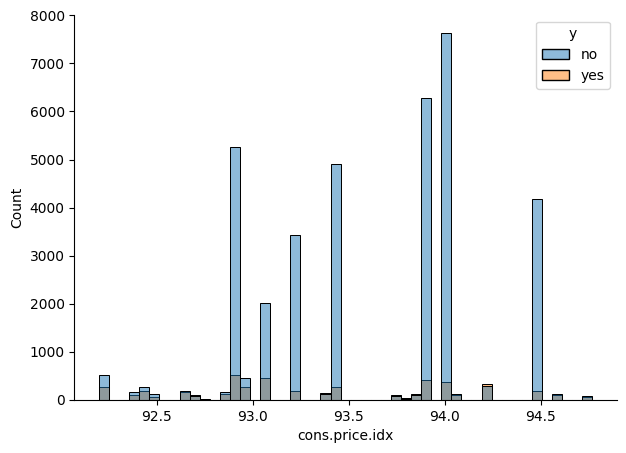

In [43]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.histplot(
    data = data,
    x = 'cons.price.idx',
    ax = axis,
    hue = 'y'
)

<Axes: xlabel='cons.price.idx'>

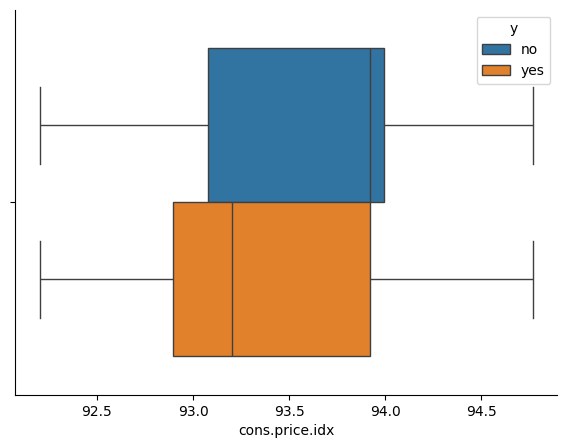

In [44]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'cons.price.idx',
    ax = axis,
    hue = 'y'
)

In [45]:
data[data['cons.price.idx'] > data['cons.price.idx'].mean()]['y'].value_counts(normalize=True)

no     0.913035
yes    0.086965
Name: y, dtype: float64

In [46]:
data[data['cons.price.idx'] <= data['cons.price.idx'].mean()]['y'].value_counts(normalize=True)

no     0.861497
yes    0.138503
Name: y, dtype: float64

**takeaways from cons.price.idx**
- no data modification required
- customers approached on lowers price index levels are more likely to subscribe to the service

#### cons.conf.idx

In [47]:
data_dict.loc['cons.conf.idx']

Description    consumer confidence index - monthly indicator (numeric) 
Name: cons.conf.idx, dtype: object

<Axes: xlabel='count', ylabel='cons.conf.idx'>

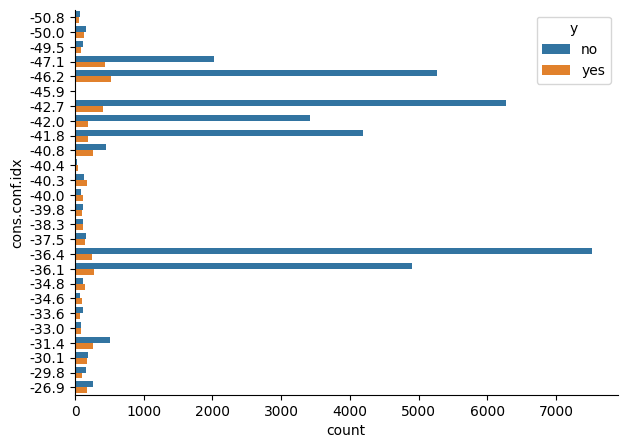

In [48]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'cons.conf.idx',
    ax = axis,
    hue = 'y'
)

In [49]:
np.quantile(data['cons.conf.idx'], 0.75)

-36.4

In [50]:
data[data['cons.conf.idx'] < np.quantile(data['cons.conf.idx'], 0.75)]['y'].value_counts(normalize=True)

no     0.882578
yes    0.117422
Name: y, dtype: float64

In [51]:
np.quantile(data['cons.conf.idx'], 0.25)

-42.7

In [52]:
data[data['cons.conf.idx'] > np.quantile(data['cons.conf.idx'], 0.25)]['y'].value_counts(normalize=True)

no     0.883347
yes    0.116653
Name: y, dtype: float64

**takeaways from cons.conf.idx**
- the relationship between the index and campaign success can be found in some clusters of the index value
- no data modification required

#### euribor3m

In [53]:
data_dict.loc['euribor3m']

Description    euribor 3 month rate - daily indicator (numeric)
Name: euribor3m, dtype: object

<Axes: xlabel='euribor3m', ylabel='Count'>

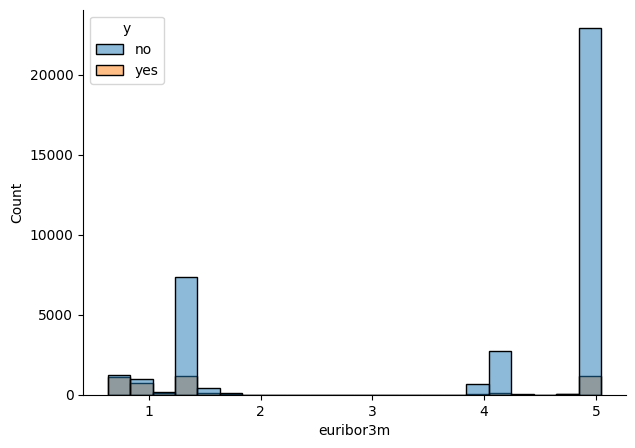

In [54]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.histplot(
    data = data,
    x = 'euribor3m',
    ax = axis,
    hue = 'y'
)

<Axes: xlabel='euribor3m'>

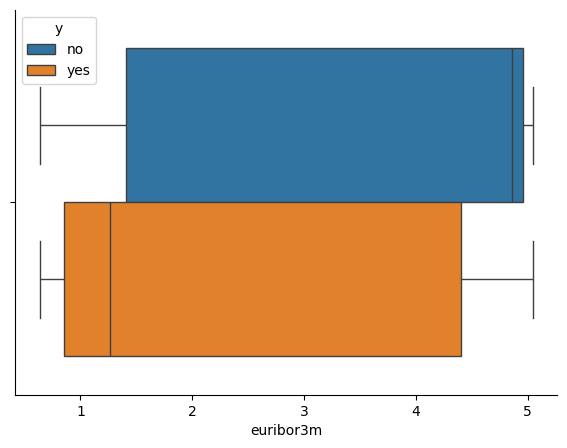

In [55]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'euribor3m',
    ax = axis,
    hue = 'y'
)

In [56]:
data[data['euribor3m'] > data['euribor3m'].mean()]['y'].value_counts(normalize=True)

no     0.95166
yes    0.04834
Name: y, dtype: float64

In [57]:
data[data['euribor3m'] < data['euribor3m'].mean()]['y'].value_counts(normalize=True)

no     0.755574
yes    0.244426
Name: y, dtype: float64

**takeaways from euribor3m**
- in accordance with the economic theory, there is a higher propensity to acquire the new subscription when interest rates are lower
- no data modification required

#### nr.employed

In [58]:
data_dict.loc['nr.employed']

Description    number employed - quarterly indicator (numeric)
Name: nr.employed, dtype: object

<Axes: xlabel='nr.employed', ylabel='Count'>

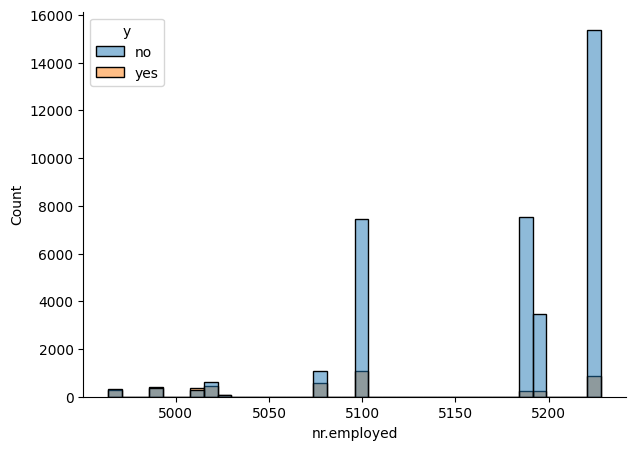

In [59]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.histplot(
    data = data,
    x = 'nr.employed',
    ax = axis,
    hue = 'y'
)

<Axes: xlabel='nr.employed'>

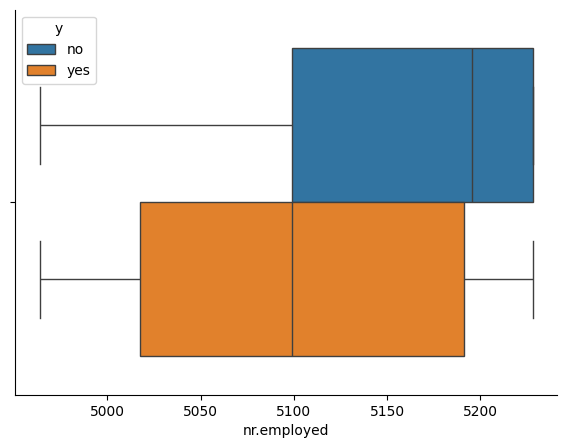

In [60]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'nr.employed',
    ax = axis,
    hue = 'y'
)

In [61]:
data[data['nr.employed'] > data['nr.employed'].mean()]['y'].value_counts(normalize=True)

no     0.951636
yes    0.048364
Name: y, dtype: float64

In [62]:
data[data['nr.employed'] < data['nr.employed'].mean()]['y'].value_counts(normalize=True)

no     0.755521
yes    0.244479
Name: y, dtype: float64

**takeaways from nr.employed**
- lower number of this variable are associated with a higher success on the marketing campaign
- no data modification required

#### job

In [63]:
data_dict.loc['job']

Description    Type of job
Name: job, dtype: object

<Axes: xlabel='count', ylabel='job'>

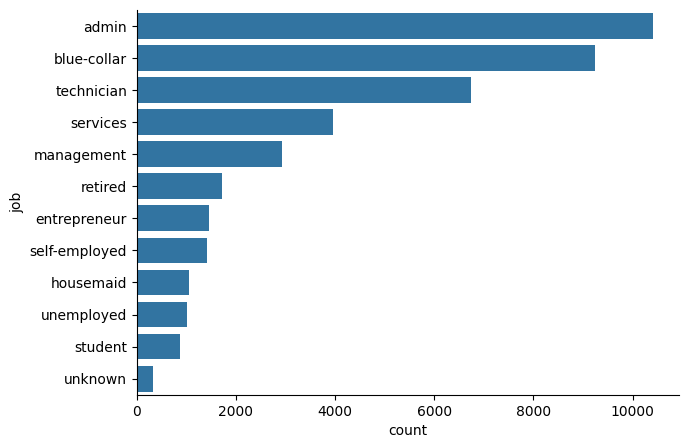

In [64]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'job',
    ax = axis,
    order = data['job'].value_counts().sort_values(ascending=False).index
)

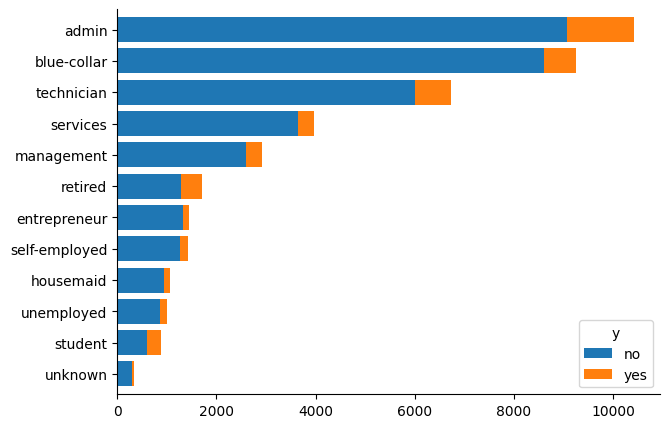

In [65]:
def cross_tab_plot(df, col1, col2):
    table = pd.crosstab(df[col1], df[col2])
    table_order = df[col1].value_counts().sort_values(ascending = True).index
    table = table.reindex(table_order)
    fig, axis = plt.subplots(figsize = (7, 5))
    sns.despine(fig)
    table.plot(kind='barh', stacked=True, ax = axis, width = 0.8)

cross_tab_plot(data, 'job', 'y')

#### marital status

In [66]:
data_dict.loc['marital']

Description    Marital status
Name: marital, dtype: object

<Axes: xlabel='count', ylabel='marital'>

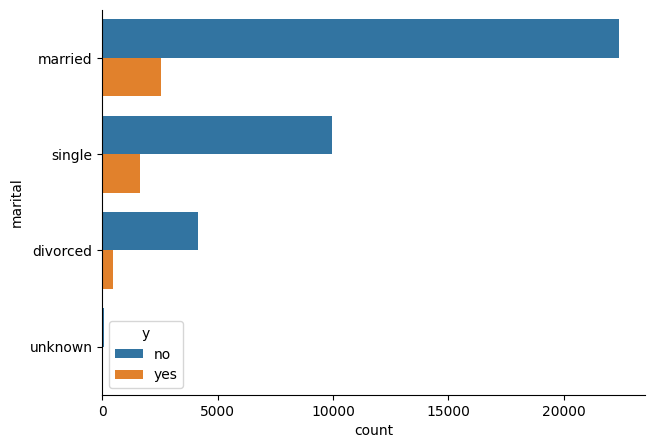

In [67]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'marital',
    ax = axis,
    order = data['marital'].value_counts().sort_values(ascending=False).index,
    hue = 'y')

In [68]:
data.groupby(by = ['marital', 'y'])['y'].count()

marital   y  
divorced  no      4135
          yes      476
married   no     22391
          yes     2530
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: y, dtype: int64

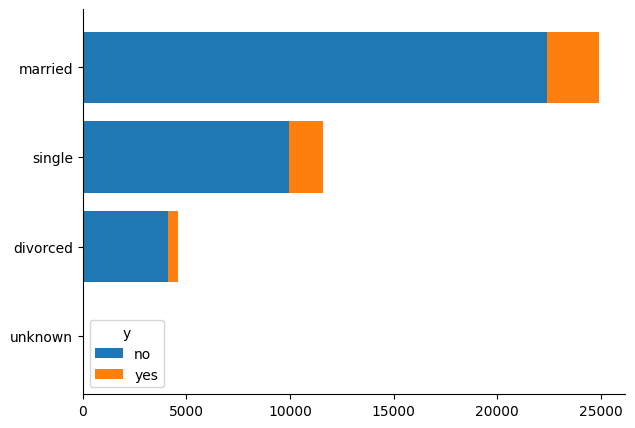

In [69]:
cross_tab_plot(data, 'marital', 'y')

#### education

<Axes: xlabel='count', ylabel='education'>

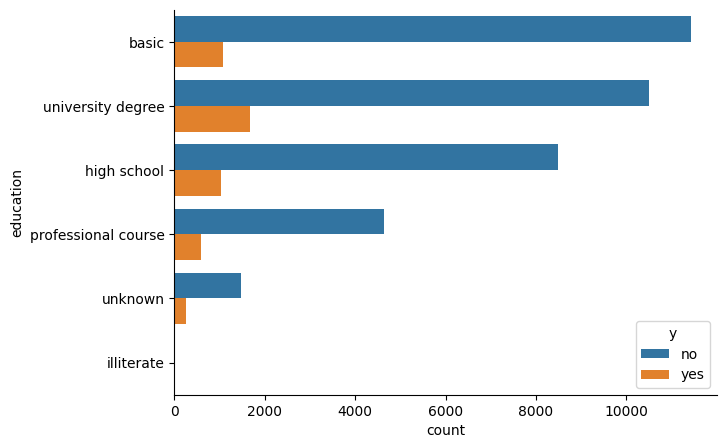

In [70]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'education',
    ax = axis,
    order = data['education'].value_counts().sort_values(ascending=False).index,
    hue = 'y')

In [71]:
data.groupby(by = ['education', 'y'])['y'].count()

education            y  
basic                no     11422
                     yes     1089
high school          no      8482
                     yes     1031
illiterate           no        14
                     yes        4
professional course  no      4647
                     yes      594
university degree    no     10497
                     yes     1669
unknown              no      1480
                     yes      251
Name: y, dtype: int64

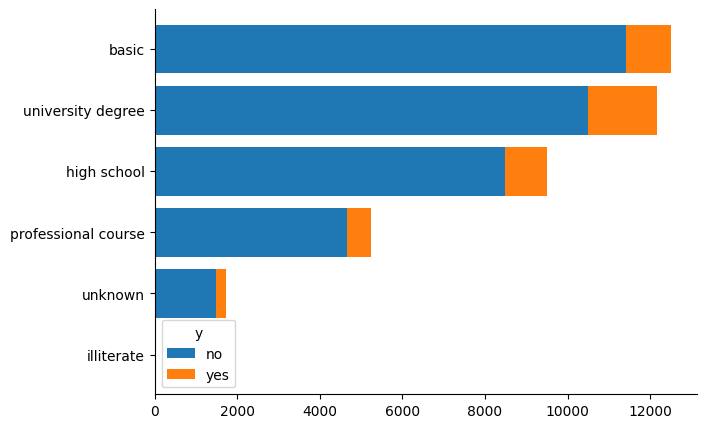

In [72]:
cross_tab_plot(data, 'education', 'y')

**import to order by education level or percentage of success**

#### default

In [73]:
data_dict.loc['default']

Description    Has credit in default
Name: default, dtype: object

<Axes: xlabel='count', ylabel='default'>

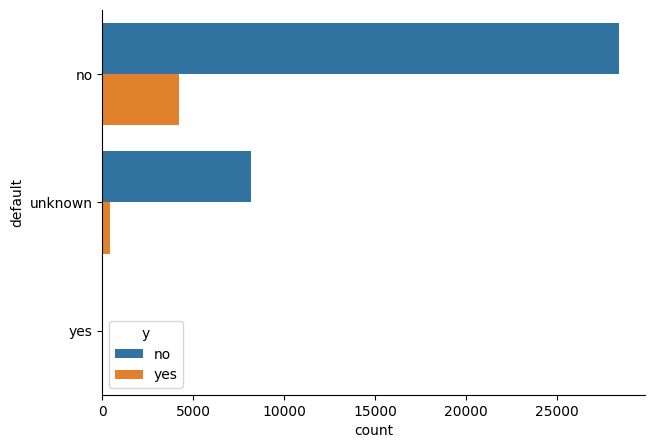

In [74]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'default',
    ax = axis,
    order = data['default'].value_counts().sort_values(ascending=False).index,
    hue = 'y')

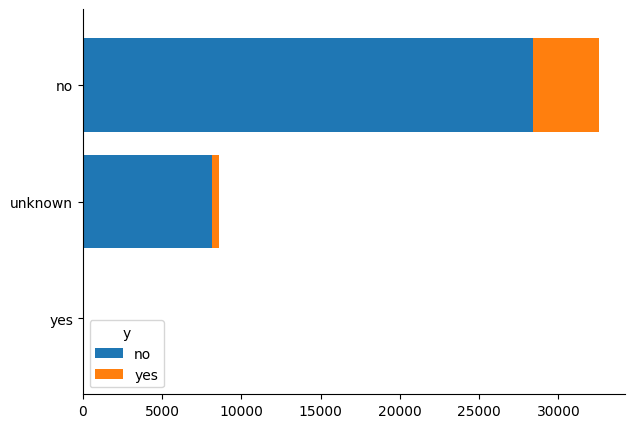

In [75]:
cross_tab_plot(data, 'default', 'y')

#### hosing

In [76]:
data_dict.loc['housing']

Description    Has a housing loan
Name: housing, dtype: object

makes no sense that some people dont know whether or not they have a mortgage 
- might be worth changing 'unknown' to 'no'

<Axes: xlabel='count', ylabel='housing'>

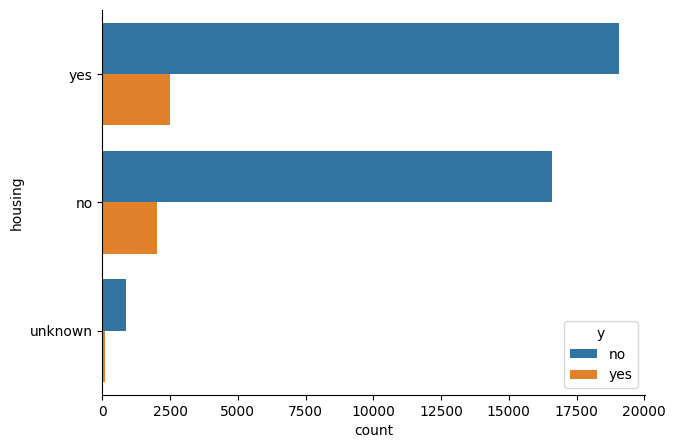

In [77]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'housing',
    ax = axis,
    order = data['housing'].value_counts().sort_values(ascending=False).index,
    hue = 'y')

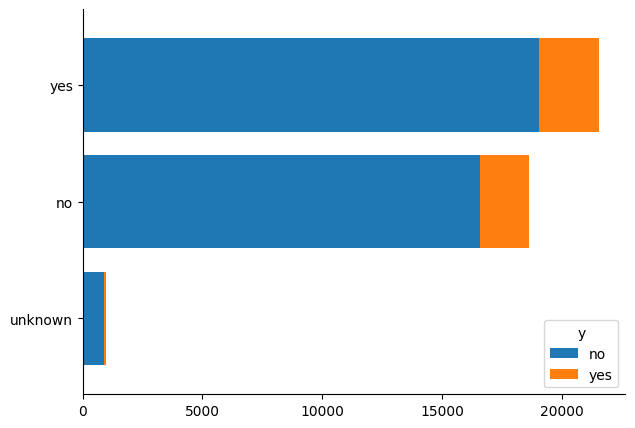

In [78]:
cross_tab_plot(data, 'housing', 'y')

#### loan

In [79]:
data_dict.loc['loan']

Description    Has a personal loan
Name: loan, dtype: object

**might be worth changing 'unknown' to 'no'**

<Axes: xlabel='count', ylabel='loan'>

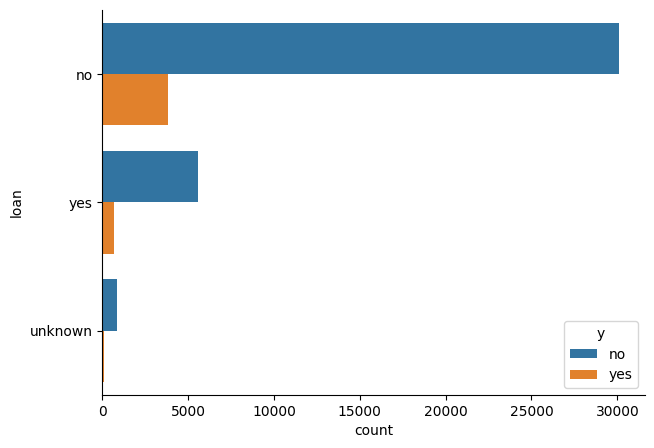

In [80]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'loan',
    ax = axis,
    order = data['loan'].value_counts().sort_values(ascending=False).index,
    hue = 'y')

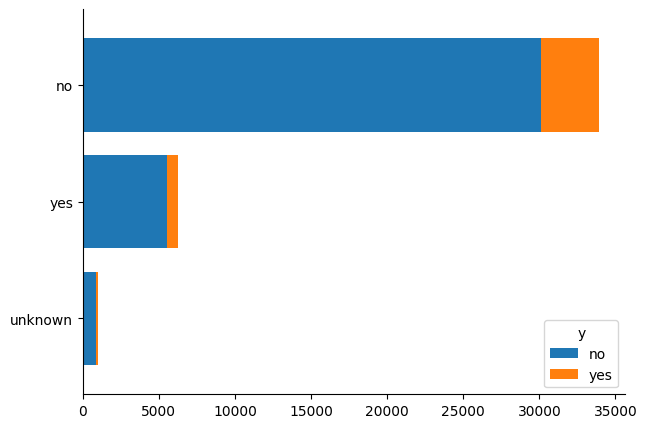

In [81]:
cross_tab_plot(data, 'loan', 'y')

#### contact

In [82]:
data_dict.loc['contact']

Description    Contact communication type
Name: contact, dtype: object

<Axes: xlabel='count', ylabel='contact'>

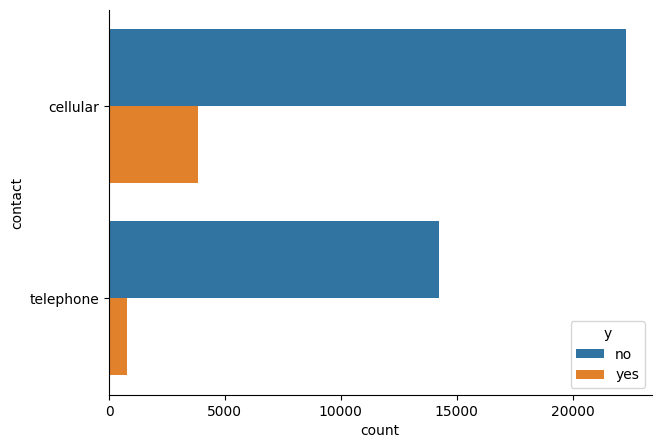

In [83]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'contact',
    ax = axis,
    order = data['contact'].value_counts().sort_values(ascending=False).index,
    hue = 'y')

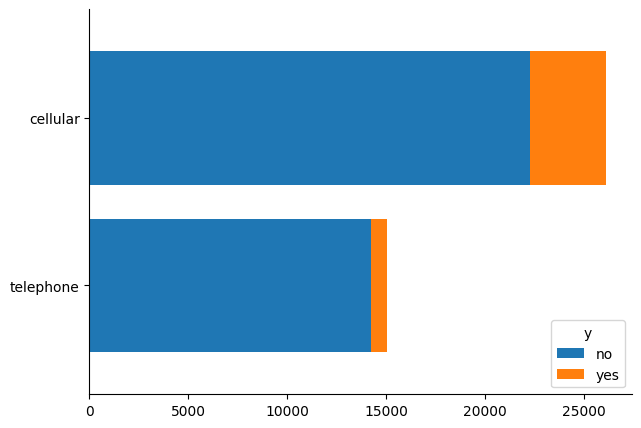

In [84]:
cross_tab_plot(data, 'contact', 'y')

#### month

In [85]:
data_dict.loc['month']

Description    Month of contact
Name: month, dtype: object

**might make more sense to plot be cronological order or higher proportoin**

<Axes: xlabel='count', ylabel='month'>

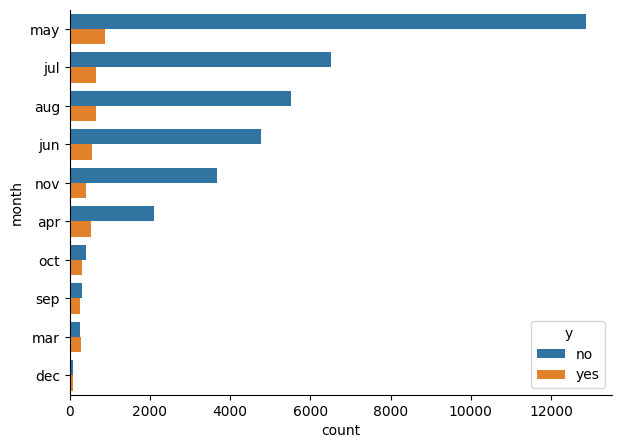

In [86]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'month',
    ax = axis,
    order = data['month'].value_counts().sort_values(ascending=False).index,
    hue = 'y')

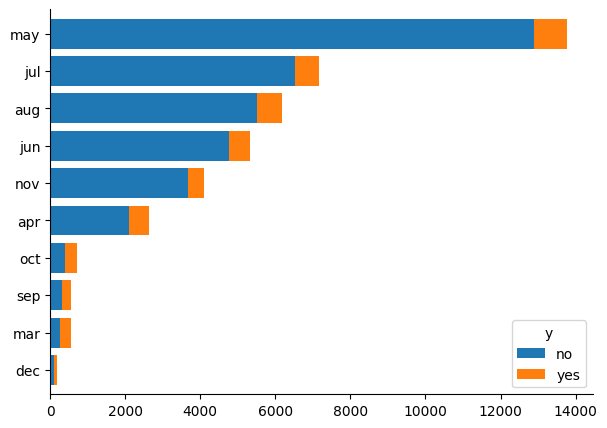

In [87]:
cross_tab_plot(data, 'month', 'y')

#### day of week

In [88]:
data_dict.loc['day']

Description    Day of contact
Name: day, dtype: object

<Axes: xlabel='count', ylabel='day_of_week'>

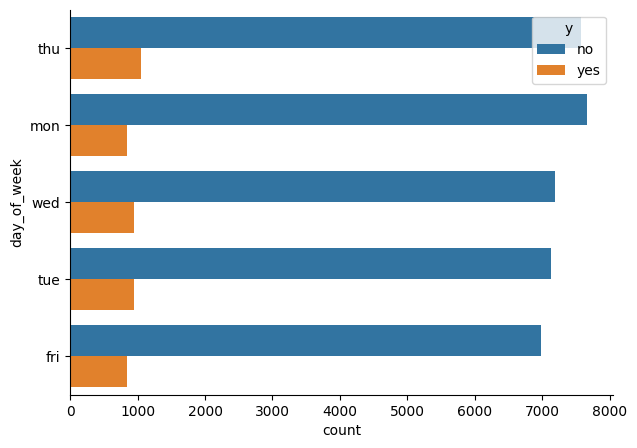

In [89]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'day_of_week',
    ax = axis,
    order = data['day_of_week'].value_counts().sort_values(ascending=False).index,
    hue = 'y')

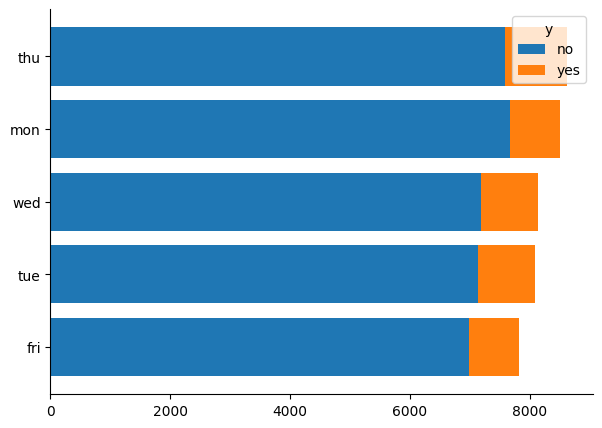

In [90]:
cross_tab_plot(data, 'day_of_week', 'y')

#### poutcome

In [91]:
data_dict.loc['poutcome']

Description    Outcome of the previous marketing campaign
Name: poutcome, dtype: object

<Axes: xlabel='count', ylabel='poutcome'>

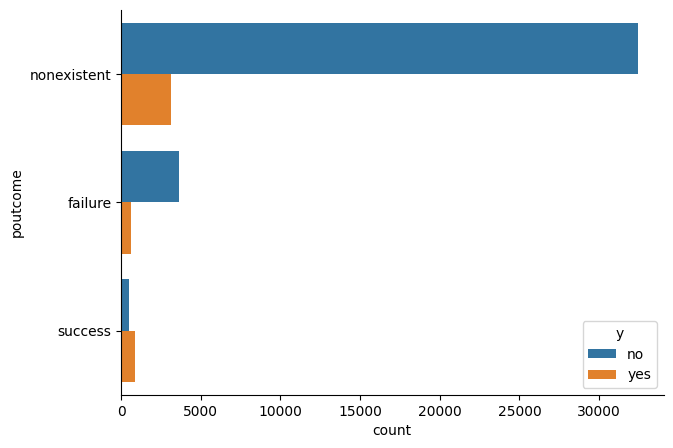

In [92]:
fig, axis = plt.subplots(figsize = (7, 5))
sns.despine(fig)
sns.countplot(
    data = data,
    y = 'poutcome',
    ax = axis,
    order = data['poutcome'].value_counts().sort_values(ascending=False).index,
    hue = 'y')

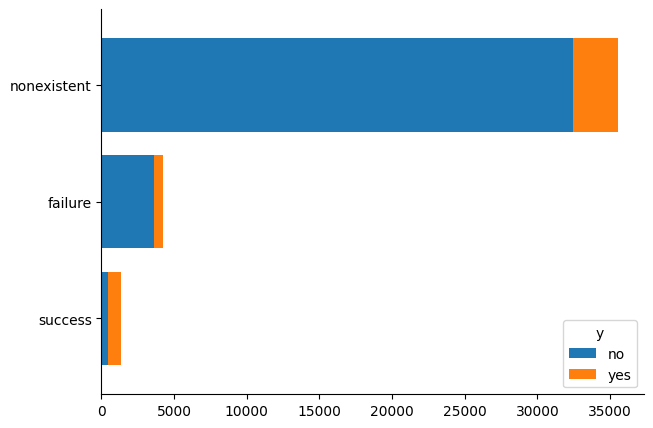

In [93]:
cross_tab_plot(data, 'poutcome', 'y')

### data cleaning

#### duration
- subset the data where duration is more than 0

In [18]:
data = data[data['duration'] > 0]

#### campaign
- subset data where campaign is less than 50, might be a typo

In [19]:
data = data[data['campaign'] < 50]

#### housing
- replace unknown to no, people must know whether or not they have a mortagege or not

In [20]:
condition = data['housing'] == 'unknown'
data.loc[condition, 'housing'] = 'no'

#### loan
- repalce unknown to no, same logic as the other one

In [21]:
condition = data['loan'] == 'unknown'
data.loc[condition, 'loan'] = 'no'

In [22]:
data.to_csv('dataset_cleaned.csv', index = False)

### final plots

In [98]:
plt.rcParams.update({'font.size': 16})

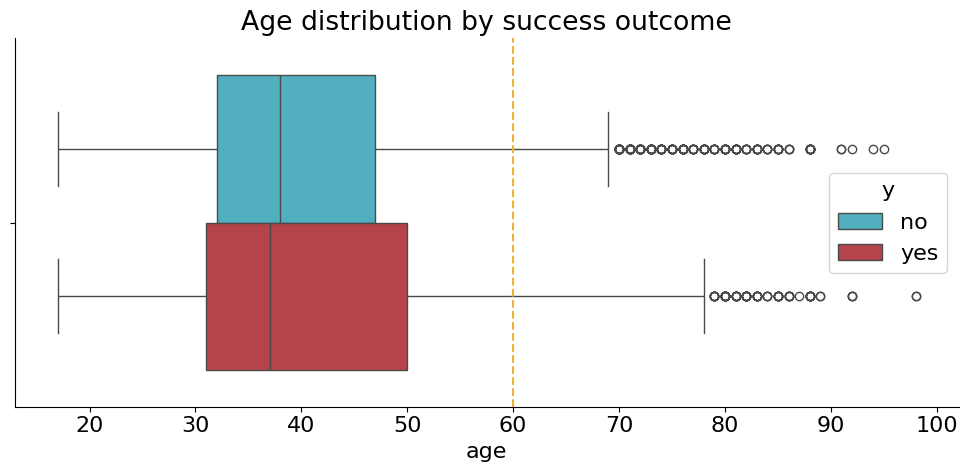

In [99]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'age',
    ax = axis,
    hue = 'y',
    palette = ['#3EBCD2', '#C7303C']
)
axis.set_title('Age distribution by success outcome')
axis.axvline(60, linestyle = '--', color = '#EBB434')
plt.tight_layout()
plt.savefig('age.jpg', dpi = 300)

In [100]:
pd.concat([data[data['age'] >= 60]['y'].value_counts(normalize=True), data[data['age'] < 60]['y'].value_counts(normalize=True)], axis=1)

,y,y
no,0.604534,0.895783
yes,0.395466,0.104217


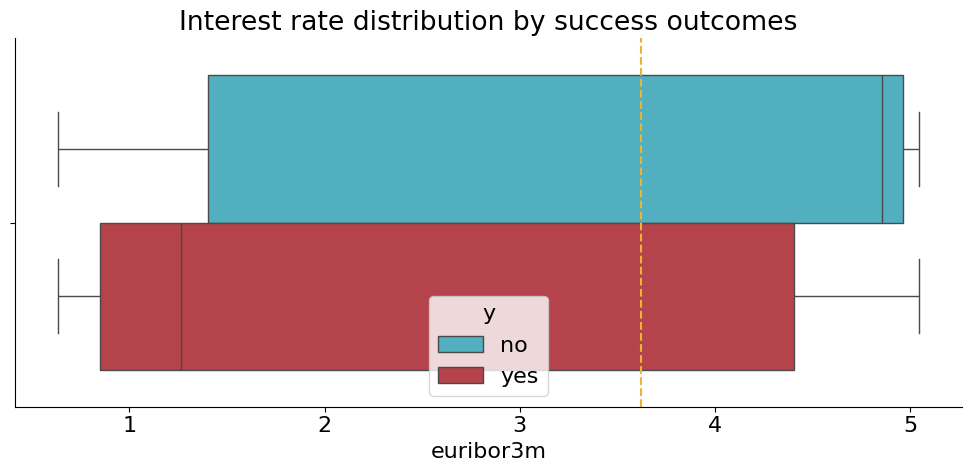

In [101]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'euribor3m',
    ax = axis,
    hue = 'y',
    palette = ['#3EBCD2', '#C7303C']
)
axis.set_title('Interest rate distribution by success outcomes')
plt.tight_layout()
axis.axvline( data['euribor3m'].mean(), linestyle = '--', color = '#EBB434')
plt.savefig('interest_rate.jpg', dpi = 300)

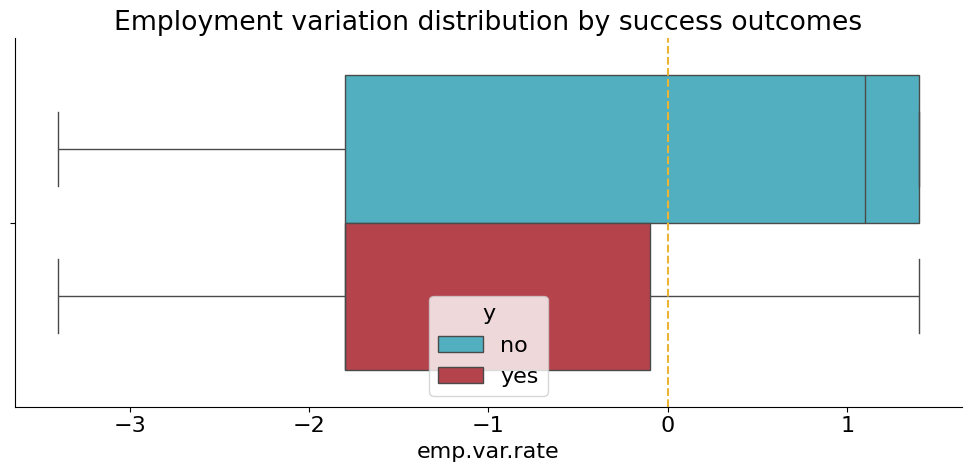

In [102]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'emp.var.rate',
    ax = axis,
    hue = 'y',
    palette = ['#3EBCD2', '#C7303C']
)
axis.set_title('Employment variation distribution by success outcomes')
plt.tight_layout()
axis.axvline(0, linestyle = '--', color = '#EBB434')
plt.savefig('employment_variation.jpg', dpi = 300)

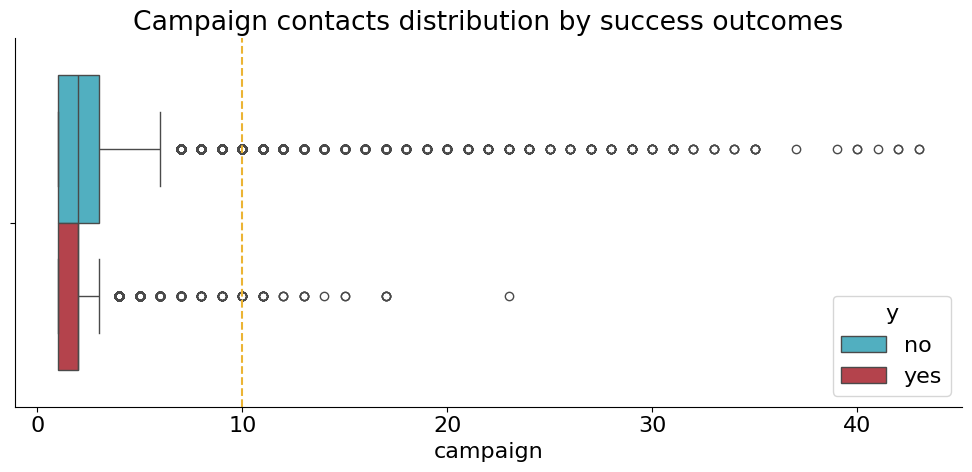

In [103]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'campaign',
    ax = axis,
    hue = 'y',
    palette = ['#3EBCD2', '#C7303C']
)
axis.set_title('Campaign contacts distribution by success outcomes')
plt.tight_layout()
axis.axvline(10, linestyle = '--', color = '#EBB434')
plt.savefig('campaign_contacts.jpg', dpi = 300)

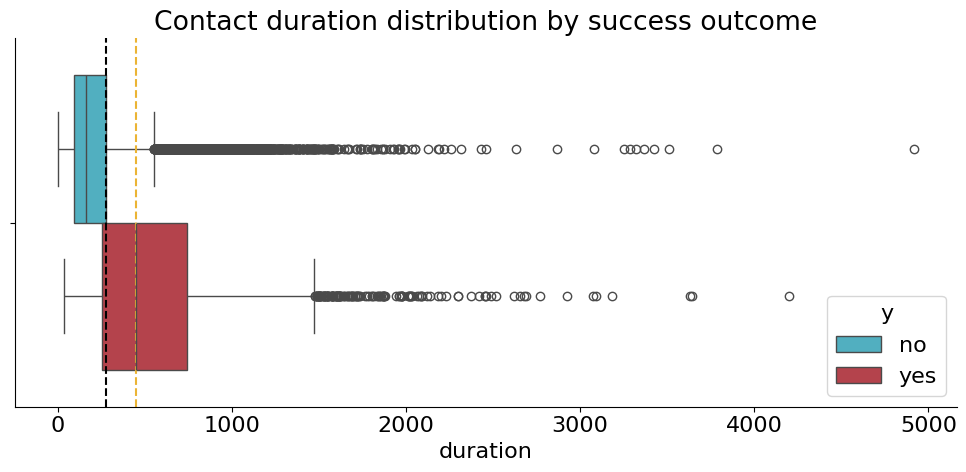

In [104]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.despine(fig)
sns.boxplot(
    data = data,
    x = 'duration',
    ax = axis,
    hue = 'y',
    palette = ['#3EBCD2', '#C7303C']
)
axis.set_title('Contact duration distribution by success outcome')
plt.tight_layout()
axis.axvline(data[data['y'] == 'yes']['duration'].median(), linestyle = '--', color = '#EBB434')
axis.axvline(np.quantile(data[data['y'] == 'no']['duration'], 0.75), linestyle = '--', color = 'black')
plt.savefig('contact_duration.jpg', dpi = 300)

In [105]:
np.quantile(data[data['y'] == 'no']['duration'], 0.75) / 60

4.65

In [106]:
data[data['y'] == 'yes']['duration'].median() 

449.0

#### function to plot categorical variables

In [107]:
def hbar_cat(df, col, target):
    # tables
    contingency_table = pd.crosstab(df[col], df[target])
    table_order = df[col].value_counts().sort_values(ascending = True).index
    contingency_table = contingency_table.reindex(table_order)
    cont_table_rel_row = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
    # plot
    fig, axis = plt.subplots(1, 2, figsize = (10, 5))
    sns.despine(fig)
    contingency_table.plot(kind = 'barh', stacked = True, ax = axis[0], width = 0.8, color = ['#3EBCD2', '#C7303C'])
    cont_table_rel_row.plot(kind = 'barh', stacked = True, ax = axis[1], width = 0.8, legend = False, color = ['#3EBCD2', '#C7303C'])
    return fig, axis

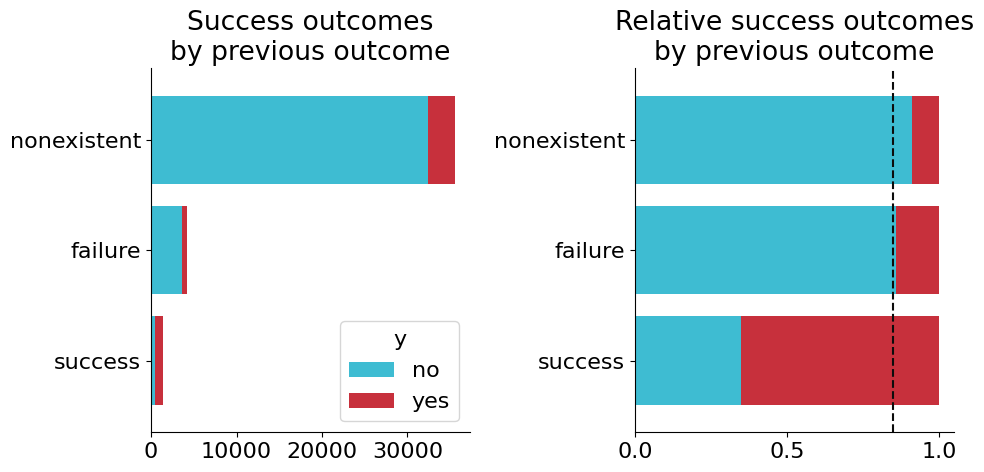

In [123]:
fig, axis = hbar_cat(data, 'poutcome', 'y')
axis[1].axvline(0.85, linestyle = '--', color = '#0C0C0C')
axis[0].set_title('Success outcomes\nby previous outcome')
axis[1].set_title('Relative success outcomes\nby previous outcome')
plt.tight_layout()
plt.savefig('previous_outcome.jpg', dpi = 300)

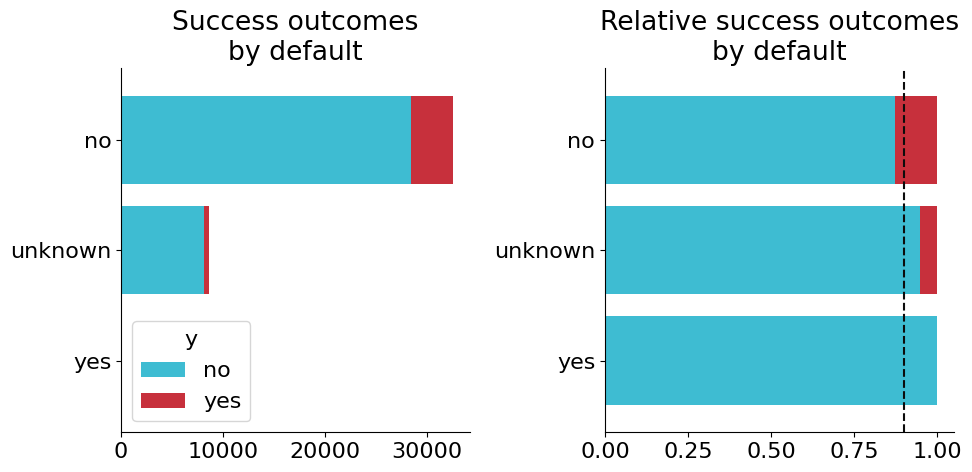

In [124]:
fig, axis = hbar_cat(data, 'default', 'y')
axis[1].axvline(0.9, linestyle = '--', color = '#0C0C0C')
axis[0].set_title('Success outcomes\nby default')
axis[1].set_title('Relative success outcomes\nby default')
plt.tight_layout()
plt.savefig('default.jpg', dpi = 300)

Text(0.5, 1.0, 'Relative success outcomes\nby day')

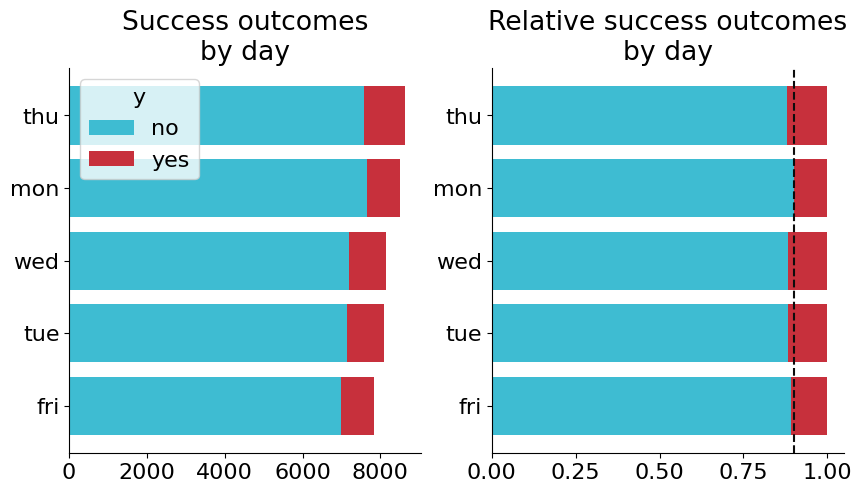

In [125]:
fig, axis = hbar_cat(data, 'day_of_week', 'y')
axis[1].axvline(0.9, linestyle = '--', color = '#0C0C0C')
axis[0].set_title('Success outcomes\nby day')
axis[1].set_title('Relative success outcomes\nby day')
# plt.savefig('month.jpg', dpi = 300)

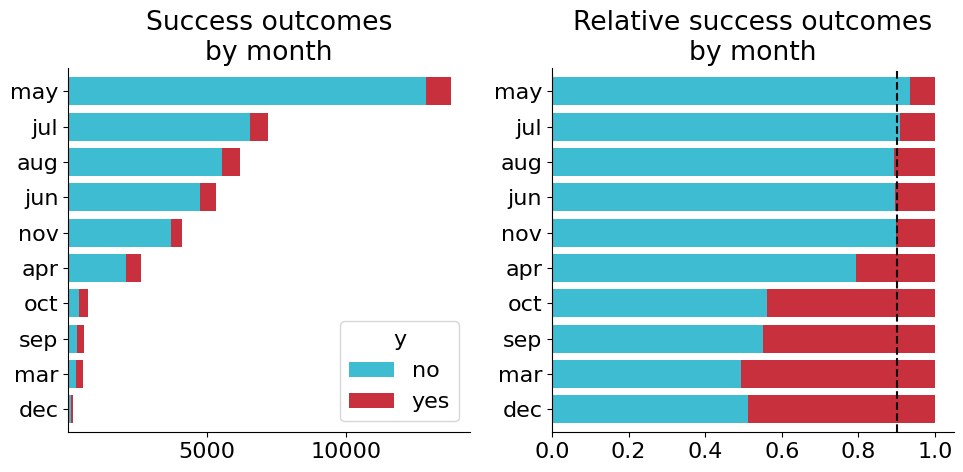

In [127]:
fig, axis = hbar_cat(data, 'month', 'y')
axis[1].axvline(0.9, linestyle = '--', color = '#0C0C0C')
axis[0].set_title('Success outcomes\nby month')
axis[1].set_title('Relative success outcomes\nby month')
axis[0].set_xticks(range(5000,15000,5000))
plt.tight_layout()
plt.savefig('month.jpg', dpi = 300)

Text(0.5, 1.0, 'Relative success outcomes by loan')

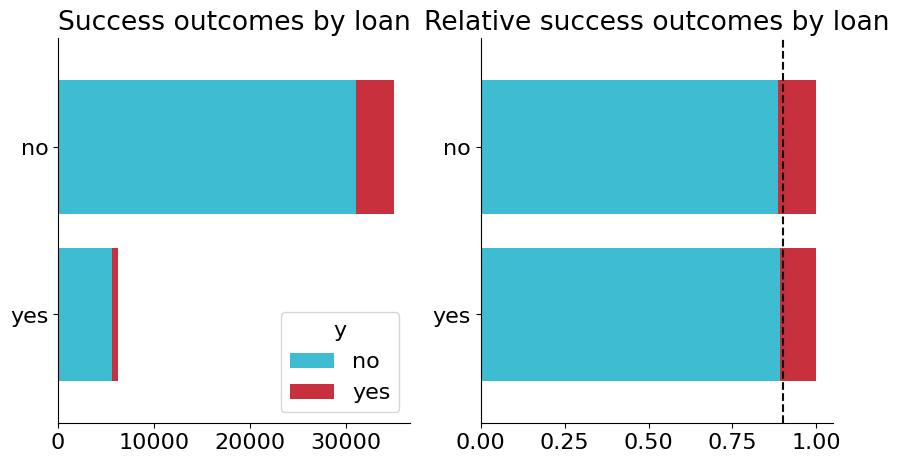

In [112]:
fig, axis = hbar_cat(data, 'loan', 'y')
axis[1].axvline(0.9, linestyle = '--', color = '#0C0C0C')
axis[0].set_title('Success outcomes by loan')
axis[1].set_title('Relative success outcomes by loan')
# plt.savefig('housing.jpg', dpi = 300)

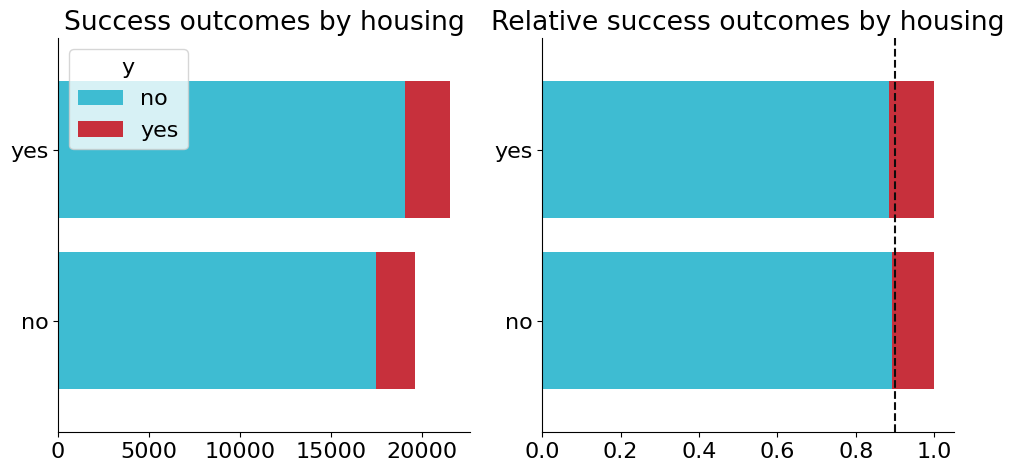

In [113]:
fig, axis = hbar_cat(data, 'housing', 'y')
axis[1].axvline(0.9, linestyle = '--', color = '#0C0C0C')
axis[0].set_title('Success outcomes by housing')
axis[1].set_title('Relative success outcomes by housing')
plt.tight_layout()
plt.savefig('housing.jpg', dpi = 300)

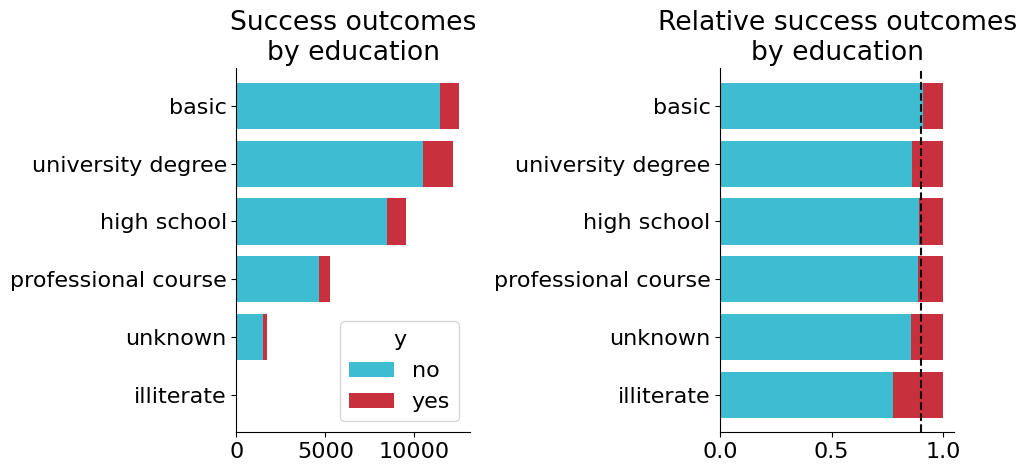

In [128]:
fig, axis = hbar_cat(data, 'education', 'y')
axis[1].axvline(0.9, linestyle = '--', color = '#0C0C0C')
axis[0].set_title('Success outcomes\nby education')
axis[1].set_title('Relative success outcomes\nby education')
plt.tight_layout()
plt.savefig('education.jpg', dpi = 300)

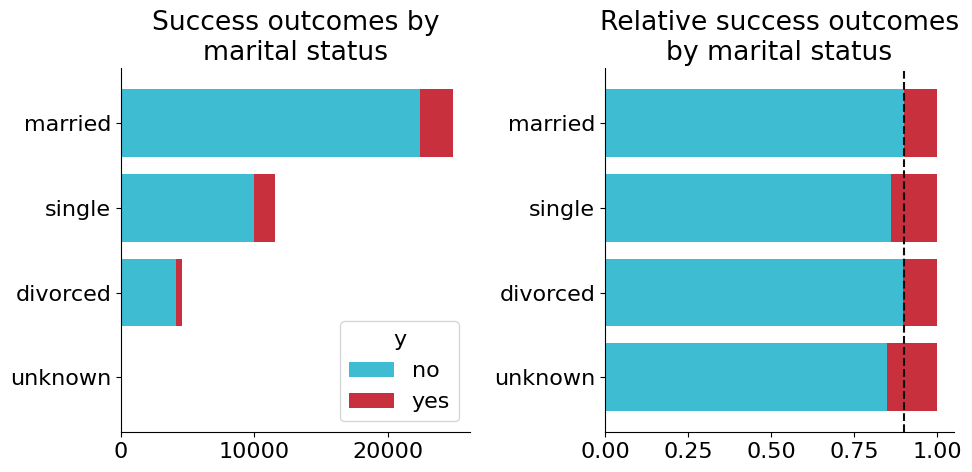

In [129]:
fig, axis = hbar_cat(data, 'marital', 'y')
axis[1].axvline(0.9, linestyle = '--', color = '#0C0C0C')
axis[0].set_title('Success outcomes by\nmarital status')
axis[1].set_title('Relative success outcomes\nby marital status')
plt.tight_layout()
plt.savefig('marital.jpg', dpi = 300)

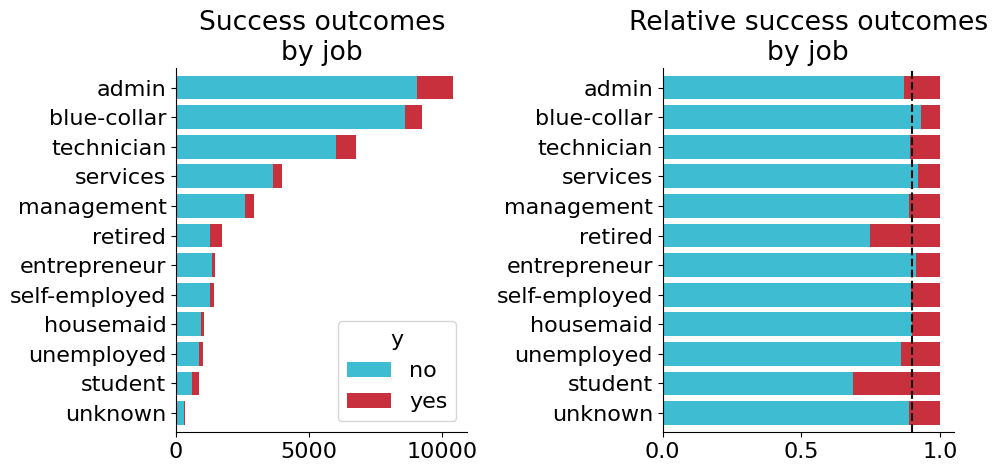

In [122]:
job_table = pd.crosstab(data['job'], data['y'])
job_order = data['job'].value_counts().sort_values(ascending = True).index
job_table = job_table.reindex(job_order)
job_table_rel = job_table.div(job_table.sum(axis=1), axis=0)

fig, axis = plt.subplots(1, 2, figsize = (10, 5))
sns.despine(fig)
job_table.plot(kind = 'barh', stacked = True, ax = axis[0], width = 0.8, color = ['#3EBCD2', '#C7303C'])
job_table_rel.plot(kind = 'barh', stacked = True, ax = axis[1], width = 0.8, legend = False, color = ['#3EBCD2', '#C7303C'])
axis[1].axvline(0.9, linestyle = '--', color = '#0C0C0C')
axis[0].set_title('Success outcomes\nby job')
axis[1].set_title('Relative success outcomes\nby job')
plt.tight_layout()
plt.savefig('job.jpg', dpi = 300)

In [117]:
def cat_table_rel(df, col, target):
    # tables
    contingency_table = pd.crosstab(df[col], df[target])
    table_order = df[col].value_counts().sort_values(ascending = True).index
    contingency_table = contingency_table.reindex(table_order)
    cont_table_rel_row = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
    return cont_table_rel_row
cat_table_rel(data, 'job', 'y')

y,no,yes
unknown,0.887879,0.112121
student,0.685714,0.314286
unemployed,0.857988,0.142012
housemaid,0.899906,0.100094
self-employed,0.895144,0.104856
entrepreneur,0.914835,0.085165
retired,0.747963,0.252037
management,0.887748,0.112252
services,0.918578,0.081422
technician,0.891872,0.108128


In [118]:
cat_table_rel(data, 'education', 'y')

y,no,yes
illiterate,0.777778,0.222222
unknown,0.854997,0.145003
professional course,0.886663,0.113337
high school,0.891599,0.108401
university degree,0.862792,0.137208
basic,0.912950,0.087050


In [119]:
data.groupby('education')['y'].count()

education
basic                  12510
high school             9511
illiterate                18
professional course     5241
university degree      12164
unknown                 1731
Name: y, dtype: int64

In [120]:
cat_table_rel(data, 'marital', 'y')

y,no,yes
unknown,0.850000,0.150000
divorced,0.896746,0.103254
single,0.859959,0.140041
married,0.898463,0.101537


In [121]:
months_rel = cat_table_rel(data, 'month', 'y')
months_rel

y,no,yes
dec,0.510989,0.489011
mar,0.494505,0.505495
sep,0.550877,0.449123
oct,0.561281,0.438719
apr,0.795135,0.204865
nov,0.898950,0.101050
jun,0.894885,0.105115
aug,0.893961,0.106039
jul,0.909534,0.090466
may,0.935620,0.064380
